<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
<h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h3>

* [1. Libraries](#1)
* [2. Reading and Exploring the Data](#2)
* [3. Graphical Exploration](#3)
    - [3.1 Which restaurant received the most orders?](#3.1)
    - [3.2 Which restaurant saw most sales?](#3.2)
    - [3.3 Which customer ordered the most?](#3.3)
    - [3.4 When do customers order more in a day?](#3.4)
    - [3.5 Which is the most liked cuisine?](#3.5)
    - [3.6 Which zone has the most sales?](#3.6)  
* [4. Conclusion of the EDA](#4)

<a id="1"></a>
<font color="darkslateblue" size=+2.5><b>1. Libraries</b></font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import openpyxl

from warnings import filterwarnings
filterwarnings("ignore")

<a id="2"></a>
<font color="darkslateblue" size=+2.5><b>2. Reading and Exploring the Data</b></font>

In [2]:
rest = pd.read_excel("Restaurants.xlsx")
order = pd.read_excel("Orders.xlsx")

In [3]:
order

,Order ID,Customer Name,Restaurant ID,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,OD1,Srini,6,2022-01-01 23:15:00,5,633,Debit Card,47,5,3
1,OD2,Revandh,13,2022-01-01 19:21:00,5,258,Credit Card,41,3,5
2,OD3,David,9,2022-01-01 23:15:00,7,594,Cash on Delivery,30,3,4
3,OD4,Selva,4,2022-01-01 20:31:00,5,868,Cash on Delivery,30,3,4
4,OD5,Vinny,4,2022-01-01 11:10:00,4,170,Debit Card,18,4,3
...,...,...,...,...,...,...,...,...,...,...
495,OD496,Chinny,20,2022-01-01 15:22:00,6,1184,Cash on Delivery,13,4,2
496,OD497,Veronica,17,2022-01-01 13:31:00,5,541,Credit Card,27,4,3
497,OD498,Chinny,10,2022-01-01 21:31:00,6,1049,Cash on Delivery,27,3,4
498,OD499,Charlie,2,2022-01-01 14:10:00,5,758,Cash on Delivery,29,3,3


In [4]:
print(f'Order Dataset shape {order.shape}')


Order Dataset shape (500, 10)


In [5]:
rest

,RestaurantID,RestaurantName,Cuisine,Zone,Category
0,1,The Cave Hotel,Continental,Zone B,Pro
1,2,SSK Hotel,North Indian,Zone D,Pro
2,3,ASR Restaurant,South Indian,Zone D,Ordinary
3,4,Win Hotel,South Indian,Zone D,Ordinary
4,5,Denver Restaurant,Continental,Zone D,Pro
5,6,Willies,French,Zone D,Pro
6,7,AMN,North Indian,Zone D,Ordinary
7,8,Oslo,French,Zone B,Ordinary
8,9,Excel Restaurant,North Indian,Zone D,Ordinary
9,10,Dave Hotel,South Indian,Zone A,Ordinary


In [6]:
print(f'Restaurant Dataset shape : {rest.shape}')

Restaurant Dataset shape : (20, 5)


In [7]:
rest.isna().sum()

RestaurantID      0
RestaurantName    0
Cuisine           0
Zone              0
Category          0
dtype: int64

In [8]:
order.isna().sum()

Order ID                      0
Customer Name                 0
Restaurant ID                 0
Order Date                    0
Quantity of Items             0
Order Amount                  0
Payment Mode                  0
Delivery Time Taken (mins)    0
Customer Rating-Food          0
Customer Rating-Delivery      0
dtype: int64

In [9]:
# Rename column for merging data
rest.rename(columns = {"RestaurantID" :"Restaurant ID"},inplace=True)

In [10]:
# Merge both dataset into one dataset for our data analysis
df = pd.merge(rest,order,on="Restaurant ID",how="left")

In [11]:
df.isna().sum()

Restaurant ID                 0
RestaurantName                0
Cuisine                       0
Zone                          0
Category                      0
Order ID                      0
Customer Name                 0
Order Date                    0
Quantity of Items             0
Order Amount                  0
Payment Mode                  0
Delivery Time Taken (mins)    0
Customer Rating-Food          0
Customer Rating-Delivery      0
dtype: int64

With the successful merging of both dataset, now it's now to do our exploratory data analysis.

<a id="3"></a>
<font color="darkslateblue" size=+2.5><b>3. Graphical Exploration</b></font>

# 3.1 Which restaurant received the most orders?

In [12]:
df["RestaurantName"].value_counts()

The Cave Hotel       32
Ellora               32
Chew Restaurant      31
Willies              30
Veer Restaurant      29
Anand Restaurant     29
Ruchi                28
Win Hotel            27
Zam Zam              25
Sam Hotel            25
KSR Hotel            24
Excel Restaurant     23
Denver Restaurant    23
Oslo                 23
ASR Restaurant       23
AMN                  22
Dave Hotel           20
SSK Hotel            20
The Taste            18
Vrinda Bhavan        16
Name: RestaurantName, dtype: int64

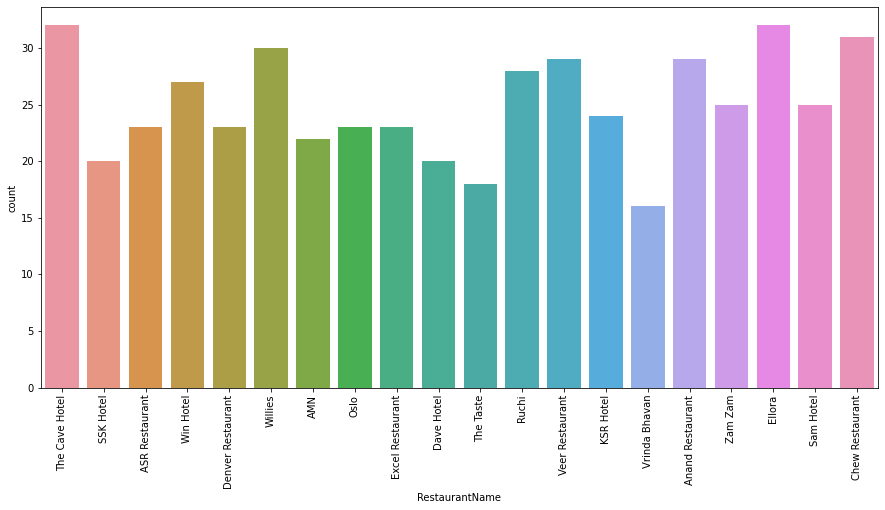

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(df["RestaurantName"],data=df)
plt.xticks(rotation=90);

From the graph above, we can see that Ellora and The Cave Hotel received the most orders

# 3.2 Which restaurant saw most sales?

In [14]:
most_sales=df.groupby(by='RestaurantName', as_index=False)["Order Amount"].sum()
most_sales=most_sales.sort_values(by='Order Amount', ascending=False)
most_sales

,RestaurantName,Order Amount
15,Veer Restaurant,19168
13,The Cave Hotel,18934
2,Anand Restaurant,18589
17,Willies,18324
6,Ellora,17863
3,Chew Restaurant,17596
12,Sam Hotel,17400
19,Zam Zam,16622
5,Denver Restaurant,15948
18,Win Hotel,15438


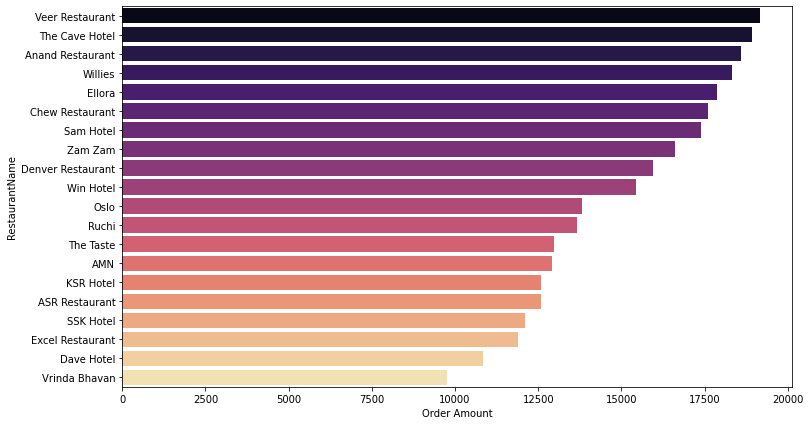

In [15]:
plt.figure(figsize=(12,7))
sns.barplot(y='RestaurantName', x='Order Amount', data=most_sales, palette='magma');

From the bar graph above, we can see that Veer Restaurant got the Most Sales with a total Order Amount of 19168.

# 3.3 Which customer ordered the most?

In [16]:
df.head()

,Restaurant ID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,1,The Cave Hotel,Continental,Zone B,Pro,OD9,David,2022-01-01 13:39:00,5,248,Debit Card,27,3,4
1,1,The Cave Hotel,Continental,Zone B,Pro,OD16,Meera,2022-01-01 12:19:00,5,546,Cash on Delivery,28,5,2
2,1,The Cave Hotel,Continental,Zone B,Pro,OD22,Suhaib,2022-01-01 17:39:00,7,630,Cash on Delivery,37,3,3
3,1,The Cave Hotel,Continental,Zone B,Pro,OD23,Meera,2022-01-01 14:31:00,1,28,Debit Card,29,3,2
4,1,The Cave Hotel,Continental,Zone B,Pro,OD58,David,2022-01-01 11:19:00,6,953,Debit Card,24,3,3


In [17]:
df["Customer Name"].value_counts()

Srini       34
Revandh     30
Ram         29
Meera       29
Suhaib      28
Rifa        28
Veer        26
Swamy       25
Farhan      25
David       24
Dev         24
Charlie     24
Sabeena     24
Vinny       22
Gopal       21
Selva       20
Shifa       20
Sweetie     19
Chinny      19
Fastin      15
Veronica    14
Name: Customer Name, dtype: int64

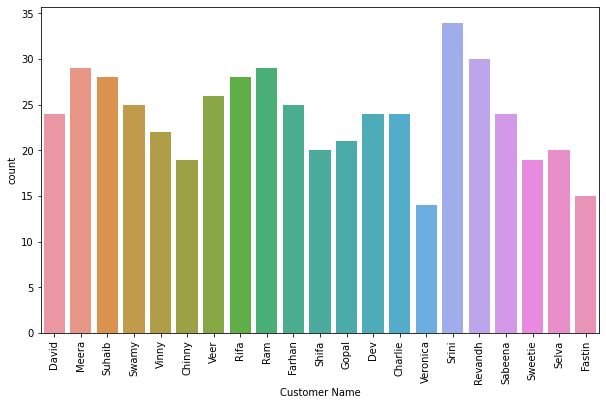

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df["Customer Name"],data=df)
plt.xticks(rotation=90);

We can observe that Srini ordered the most orders

# 3.4 When do customers order more in a day?

In [19]:
df.head()

,Restaurant ID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery
0,1,The Cave Hotel,Continental,Zone B,Pro,OD9,David,2022-01-01 13:39:00,5,248,Debit Card,27,3,4
1,1,The Cave Hotel,Continental,Zone B,Pro,OD16,Meera,2022-01-01 12:19:00,5,546,Cash on Delivery,28,5,2
2,1,The Cave Hotel,Continental,Zone B,Pro,OD22,Suhaib,2022-01-01 17:39:00,7,630,Cash on Delivery,37,3,3
3,1,The Cave Hotel,Continental,Zone B,Pro,OD23,Meera,2022-01-01 14:31:00,1,28,Debit Card,29,3,2
4,1,The Cave Hotel,Continental,Zone B,Pro,OD58,David,2022-01-01 11:19:00,6,953,Debit Card,24,3,3


In [20]:
# Changing the data type for date columns
timestamp_cols = ['Order Date']
for col in timestamp_cols:
    df[col] = pd.to_datetime(df[col])
    
# Extracting attributes for Order Date - Hour and Time of the Day
df['order_date_hour'] = df['Order Date'].apply(lambda x: x.hour)
hours_bins = [6, 12, 18, 23]
hours_labels = ['Morning', 'Afternoon', 'Night']
df['order_date_hourday'] = pd.cut(df['order_date_hour'], hours_bins, labels=hours_labels)

# New DataFrame after transformations
df.head()

,Restaurant ID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,order_date_hour,order_date_hourday
0,1,The Cave Hotel,Continental,Zone B,Pro,OD9,David,2022-01-01 13:39:00,5,248,Debit Card,27,3,4,13,Afternoon
1,1,The Cave Hotel,Continental,Zone B,Pro,OD16,Meera,2022-01-01 12:19:00,5,546,Cash on Delivery,28,5,2,12,Morning
2,1,The Cave Hotel,Continental,Zone B,Pro,OD22,Suhaib,2022-01-01 17:39:00,7,630,Cash on Delivery,37,3,3,17,Afternoon
3,1,The Cave Hotel,Continental,Zone B,Pro,OD23,Meera,2022-01-01 14:31:00,1,28,Debit Card,29,3,2,14,Afternoon
4,1,The Cave Hotel,Continental,Zone B,Pro,OD58,David,2022-01-01 11:19:00,6,953,Debit Card,24,3,3,11,Morning


<AxesSubplot:xlabel='order_date_hourday', ylabel='count'>

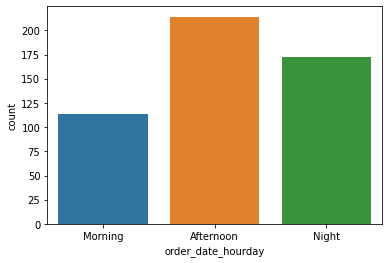

In [21]:
sns.countplot("order_date_hourday",data=df)

From the graphs above, we can see that customers often order during Afternoon period mainly at 2PM in a day.

# 3.5 Which is the most liked cuisine?

In [22]:
most=df.groupby("Cuisine",as_index=False)["Order Amount"].sum()
most=most.sort_values(by="Order Amount",ascending=False)
most

,Cuisine,Order Amount
6,North Indian,46706
3,Chinese,45437
5,French,45121
7,South Indian,38855
0,African,36452
2,Belgian,34996
4,Continental,34882
1,Arabian,16622


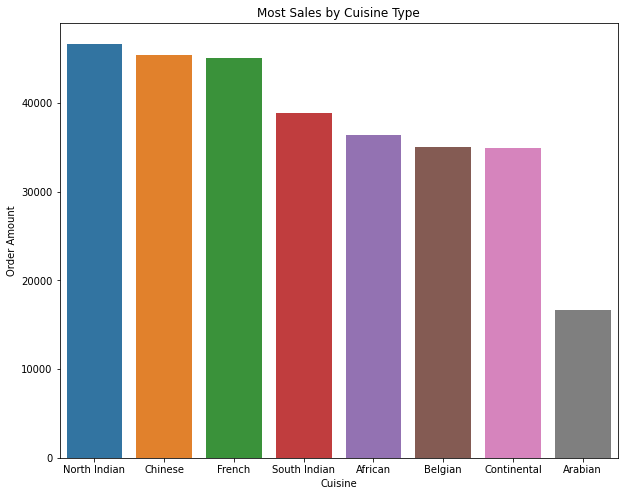

In [23]:
plt.figure(figsize=(10,8))
sns.barplot(x="Cuisine",y="Order Amount",data=most);
plt.title("Most Sales by Cuisine Type");

In [24]:
most_rating=df.groupby("Cuisine",as_index=False)["Customer Rating-Delivery"].sum();
most_rating=most_rating.sort_values(by="Customer Rating-Delivery",ascending=False)
most_rating

,Cuisine,Customer Rating-Delivery
6,North Indian,243
3,Chinese,231
7,South Indian,230
5,French,210
0,African,188
4,Continental,169
2,Belgian,148
1,Arabian,77


Text(0.5, 1.0, 'Most liked Rating Cuisine Type')

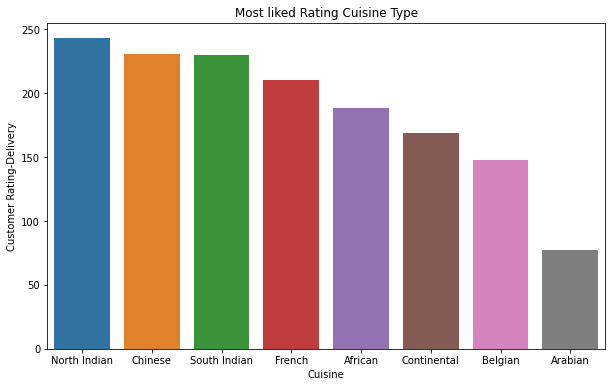

In [25]:
plt.figure(figsize=(10,6));
sns.barplot(x="Cuisine",y="Customer Rating-Delivery",data=most_rating);
plt.title("Most liked Rating Cuisine Type")

By checking both sales and customer food ratings by cuisine type, we can see that North Indian is the most liked cuisine type,
which also has the highest sales among all cuisine types

# 3.6 Which zone has the most sales?

In [26]:
most_zone=df.groupby("Zone",as_index=False)["Order Amount"].sum()
most_zone=most_zone.sort_values(by="Order Amount",ascending=False)
most_zone

,Zone,Order Amount
3,Zone D,128163
1,Zone B,77001
2,Zone C,53074
0,Zone A,40833


Text(0.5, 1.0, 'Most Sales by Zones')

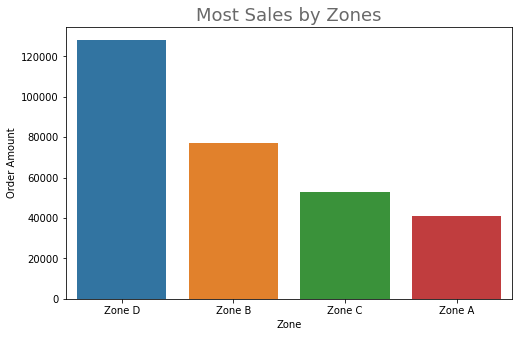

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x="Zone",y="Order Amount",data=most_zone)
plt.title('Most Sales by Zones', size=18, color='dimgrey')

From the graphs above, we can see that Zone D had the most sales among all zones.

In [32]:
df["Payment Mode"].value_counts()

Debit Card          174
Cash on Delivery    169
Credit Card         157
Name: Payment Mode, dtype: int64

In [33]:
b=df.groupby("Zone",as_index=False)["Payment Mode"].value_counts()
b

,Zone,Payment Mode,count
0,Zone A,Debit Card,26
1,Zone A,Cash on Delivery,24
2,Zone A,Credit Card,19
3,Zone B,Cash on Delivery,48
4,Zone B,Debit Card,47
5,Zone B,Credit Card,37
6,Zone C,Credit Card,39
7,Zone C,Cash on Delivery,24
8,Zone C,Debit Card,23
9,Zone D,Debit Card,78


<AxesSubplot:xlabel='Zone', ylabel='count'>

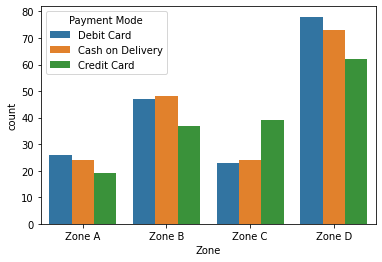

In [34]:
sns.barplot(x="Zone",y="count",data=b,hue="Payment Mode")

In [35]:
df.head(2)

,Restaurant ID,RestaurantName,Cuisine,Zone,Category,Order ID,Customer Name,Order Date,Quantity of Items,Order Amount,Payment Mode,Delivery Time Taken (mins),Customer Rating-Food,Customer Rating-Delivery,order_date_hour,order_date_hourday
0,1,The Cave Hotel,Continental,Zone B,Pro,OD9,David,2022-01-01 13:39:00,5,248,Debit Card,27,3,4,13,Afternoon
1,1,The Cave Hotel,Continental,Zone B,Pro,OD16,Meera,2022-01-01 12:19:00,5,546,Cash on Delivery,28,5,2,12,Morning


In [36]:
df["Category"].value_counts()

Ordinary    321
Pro         179
Name: Category, dtype: int64

In [37]:
c=df.groupby("Zone",as_index=False)["Category"].value_counts()

<AxesSubplot:xlabel='Zone', ylabel='count'>

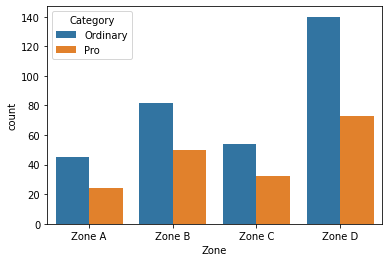

In [38]:
sns.barplot(x="Zone",y="count",hue="Category",data=c)

In [39]:
d=df.groupby("Cuisine",as_index=False)["Payment Mode"].value_counts()

<AxesSubplot:xlabel='Cuisine', ylabel='count'>

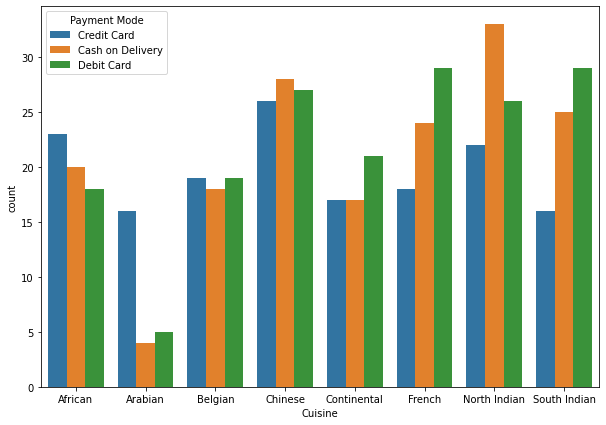

In [40]:
plt.figure(figsize=(10,7))
sns.barplot(x="Cuisine",y="count",hue="Payment Mode",data=d)

<a id="4"></a>
<font color="dimgrey" size=+2.0><b>4. Conclusion of the EDA</b></font>

To conclude, if you are a restaurant owner who is planning to open a delivery store, I suggest you should target 
to do North Indian, Chinese, or French cuisine type delivery store and rent a place in Zone D area. Once you rent your store 
and wants to do marketing promtion with your store, try to do it during 10AM and 1PM right before 11PM and 2PM,
which are the order peak hour because when customers are thinking to order food delivery for their lunch,
your promotion message pops up on their phone or social media right before their lunch at the right time,
that's the most effective way to attract your new customers.